In [ ]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import shutil
import random
from sklearn.metrics import confusion_matrix
import cv2

In [ ]:
# Accessing all folder names to get list of labels.
facial_age_path='face_age'  # directory of dataset
classlist=os.listdir(facial_age_path)  # list of all directories in the folder.
facial_age_folders = np.sort(classlist)
facial_age_folders

array(['001', '002', '003', '004', '005', '006', '007', '008', '009',
       '010', '011', '012', '013', '014', '015', '016', '017', '018',
       '019', '020', '021', '022', '023', '024', '025', '026', '027',
       '028', '029', '030', '031', '032', '033', '034', '035', '036',
       '037', '038', '039', '040', '041', '042', '043', '044', '045',
       '046', '047', '048', '049', '050', '051', '052', '053', '054',
       '055', '056', '057', '058', '059', '060', '061', '062', '063',
       '064', '065', '066', '067', '068', '069', '070', '071', '072',
       '073', '074', '075', '076', '077', '078', '079', '080', '081',
       '082', '083', '084', '085', '086', '087', '088', '089', '090',
       '091', '092', '093', '095', '096', '099', '100', '101', '110'],
      dtype='<U3')

In [ ]:
# Accessing the images inside every folder and storing the info in a dictionary with
# the age labels (folder name) as keys and the no. of images in each folder as values.

facial_age_images = {}

for age in facial_age_folders:
    temp_path = os.path.join(facial_age_path, age)
    n_images = len(os.listdir(temp_path))
    facial_age_images[int(age)] = n_images

In [ ]:
facial_age_images[1]

1112

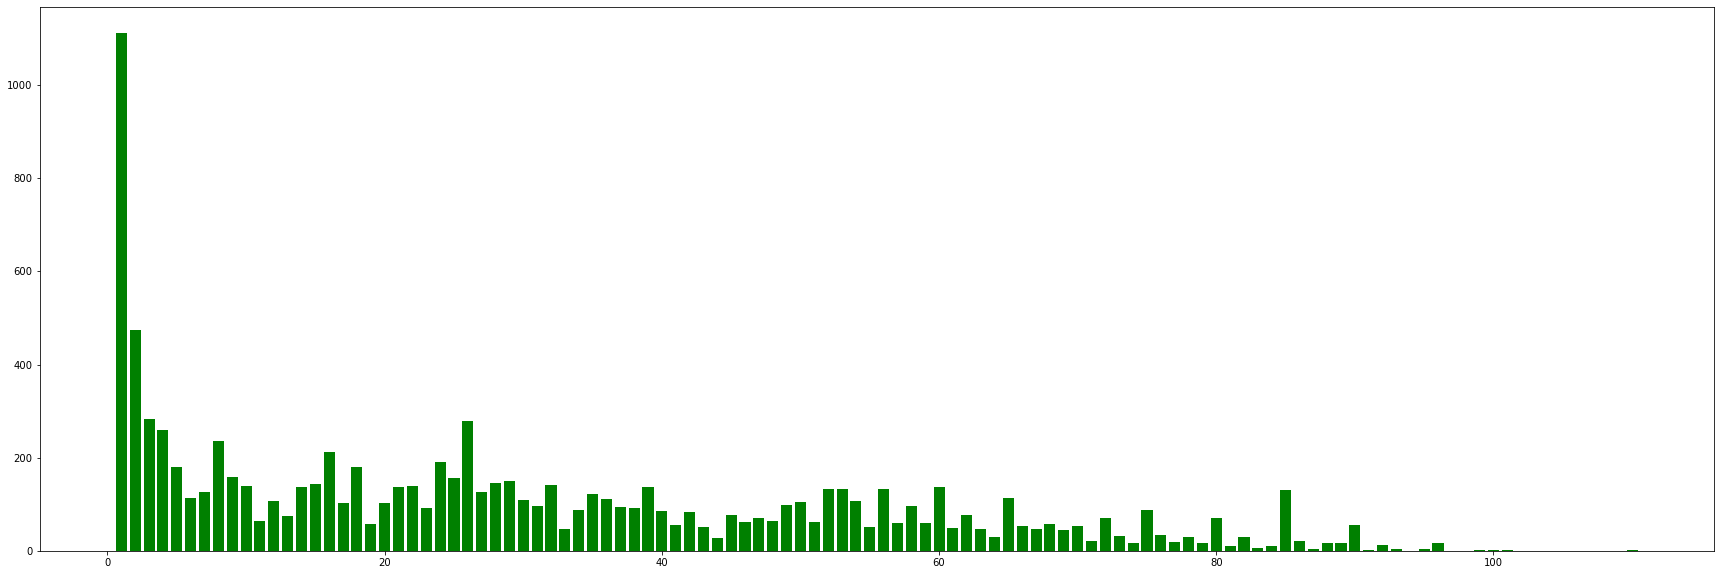

In [ ]:
plt.figure(figsize=(30, 10))

plt.bar(list(facial_age_images.keys()), facial_age_images.values(), color='g')

plt.show()

In [ ]:
# distribute the images into classes

age_splits = [1,5,12,19,35,45,65,111]

age_splits_ranges = [[int(x) for x in list(range(age_splits[idx],age_splits[idx+1]))] for idx in range(len(age_splits)-1)]

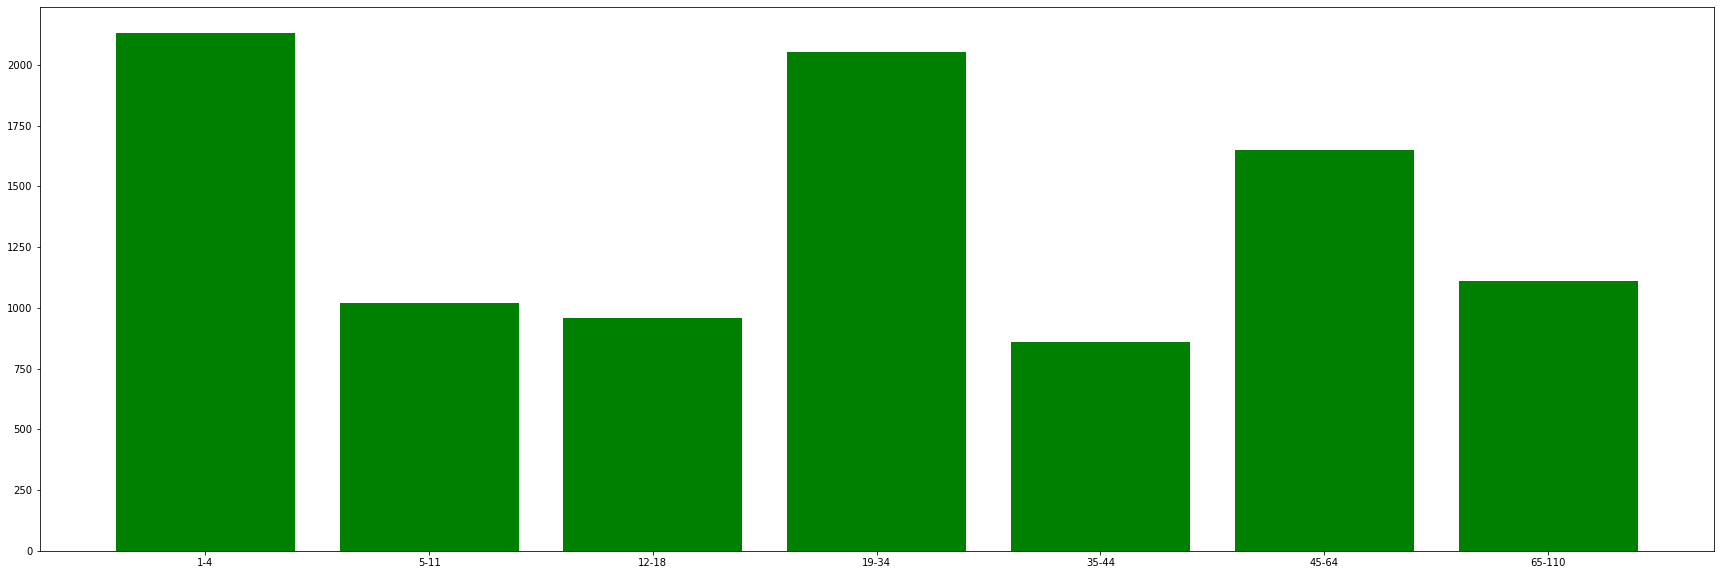

In [ ]:
age_groups = {}

for age_range in age_splits_ranges:
    total = 0
    for age in age_range:
        if age in facial_age_images:
            total += facial_age_images[age]
    age_groups[f'{age_range[0]}-{age_range[-1]}'] = total
    
#age_groups
plt.figure(figsize=(30, 10))

plt.bar(list(age_groups.keys()), age_groups.values(), color='g')

plt.show()

In [ ]:
age_groups

{'1-4': 2131,
 '5-11': 1018,
 '12-18': 957,
 '19-34': 2055,
 '35-44': 858,
 '45-64': 1648,
 '65-110': 1111}

In [ ]:
age_groups.keys()

dict_keys(['1-4', '5-11', '12-18', '19-34', '35-44', '45-64', '65-110'])

In [ ]:
details = {
    'age_range' : age_groups.keys(),
    'no_of_images' : age_groups.values(),
}

In [ ]:
df = pd.DataFrame(details)
df

,age_range,no_of_images
0,1-4,2131
1,5-11,1018
2,12-18,957
3,19-34,2055
4,35-44,858
5,45-64,1648
6,65-110,1111


In [ ]:
def class_labels(age):
    if 1 <= age <= 4:
        return 0
    elif 5 <= age <= 11:
        return 1
    elif 12 <= age <= 18:
        return 2
    elif 19 <= age <= 34:
        return 3
    elif 35 <= age <= 44:
        return 4
    elif 45 <= age <= 64:
        return 5
    else:
        return 6

In [ ]:
combined_faces_path = "face_age"
combined_faces_image_names = os.listdir(combined_faces_path)

In [ ]:
sdir="face_age"
classlist=os.listdir(sdir)  
#print(classlist)
filepaths=[]
labels=[] 
for klass in classlist:
    # joins two paths
    classpath=os.path.join(sdir,klass)
    #print(classpath)
    # getting classlist images and storing in array
    flist=os.listdir(classpath)
    for f in flist:
        # Downloads/Dataset\25-30\25_0_0_20170102233320979.jpg like this
        fpath=os.path.join(classpath,f)
        filepaths.append(fpath)
        labels.append(int(klass))
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='age')
df1=pd.concat([Fseries, Lseries], axis=1) 
df1
    

,filepaths,age
0,face_age\001\1000.png,1
1,face_age\001\1018.png,1
2,face_age\001\1030.png,1
3,face_age\001\1062.png,1
4,face_age\001\1068.png,1
...,...,...
9773,face_age\100\2694.png,100
9774,face_age\100\6408.png,100
9775,face_age\101\1554.png,101
9776,face_age\110\3906.png,110


In [ ]:
df1['target'] = df1['age'].map(class_labels)

In [ ]:
df1['filepaths'] = df1['filepaths'].str.replace('\\','/')

<ipython-input-102-18df00f2ae72>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df1['filepaths'] = df1['filepaths'].str.replace('\\','/')


In [ ]:
df1

,filepaths,age,target
0,face_age/001/1000.png,1,0
1,face_age/001/1018.png,1,0
2,face_age/001/1030.png,1,0
3,face_age/001/1062.png,1,0
4,face_age/001/1068.png,1,0
...,...,...,...
9773,face_age/100/2694.png,100,6
9774,face_age/100/6408.png,100,6
9775,face_age/101/1554.png,101,6
9776,face_age/110/3906.png,110,6


In [ ]:
import cv2
image = cv2.imread(df1['filepaths'][0],0)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('image', image)
cv2.waitKey(0)

-1

In [ ]:
X = df1[['filepaths', 'age']]
y = df1['target']

In [ ]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import gaussian, sobel
from skimage.feature import canny

import os
from zipfile import ZipFile
import time
from datetime import datetime

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataset into training and testing datasets with test_size=0.3 and stratify=y. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
X_train.shape

(6844, 2)

In [ ]:
X_train.head()

,filepaths,age
1289,face_age\002\4293.png,2
5383,face_age\027\9696.png,27
4573,face_age\023\4206.png,23
9669,face_age\089\210.png,89
5621,face_age\029\6082.png,29


In [ ]:
y_train.value_counts(normalize=True)

0    0.218001
3    0.210111
5    0.168469
6    0.113676
1    0.104033
2    0.097896
4    0.087814
Name: target, dtype: float64

In [ ]:
temp_X_train = X_train.copy()
temp_X_train['target'] = y_train

temp_X_test = X_test.copy()
temp_X_test['target'] = y_test

In [ ]:
temp_X_train

,filepaths,age,target
1289,face_age\002\4293.png,2,0
5383,face_age\027\9696.png,27,3
4573,face_age\023\4206.png,23,3
9669,face_age\089\210.png,89,6
5621,face_age\029\6082.png,29,3
...,...,...,...
3937,face_age\018\1393.png,18,2
1100,face_age\001\9697.png,1,0
915,face_age\001\8350.png,1,0
3041,face_age\010\7568.png,10,1


In [ ]:
# Exporting the above created dataframes as CSV files.

temp_X_train.to_csv("images_filenames_labels_train.csv", index=False)
temp_X_test.to_csv("images_filenames_labels_test.csv", index=False)

In [ ]:
def give_col_image(path):
    img = cv2.imread(path)
    col_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    return col_img

In [ ]:
def give_gray_image(col_img):
    gray_img = cv2.cvtColor(col_img, cv2.COLOR_BGR2GRAY)
    
    return gray_img

In [ ]:
def give_gaussian_image(gray_img):
    gaussian_img = gaussian(gray_img, sigma=4)
    
    return gaussian_img

In [ ]:
def give_entropy_image(gray_img):
    entropy_img = entropy(gray_img, disk(5))
    
    return entropy_img

In [ ]:
def give_gabor_image(gray_img):

    ksize = 5
    sigma = 0.5
    theta = 1*np.pi/4
    lamda = 1*np.pi/4
    gamma = 0.8
    phi = 0

    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
    gabor_img = cv2.filter2D(gray_img, cv2.CV_8UC3, gabor_kernel)
    
    return gabor_img

In [ ]:
def give_sobel_image(gray_img):
    sobel_img = sobel(gray_img)
    
    return sobel_img

In [ ]:
def give_canny_image(gray_img):
    # canny_img = cv2.Canny(gray_img, 80, 180)
    canny_img = canny(gray_img, sigma=0.9)
    
    return canny_img

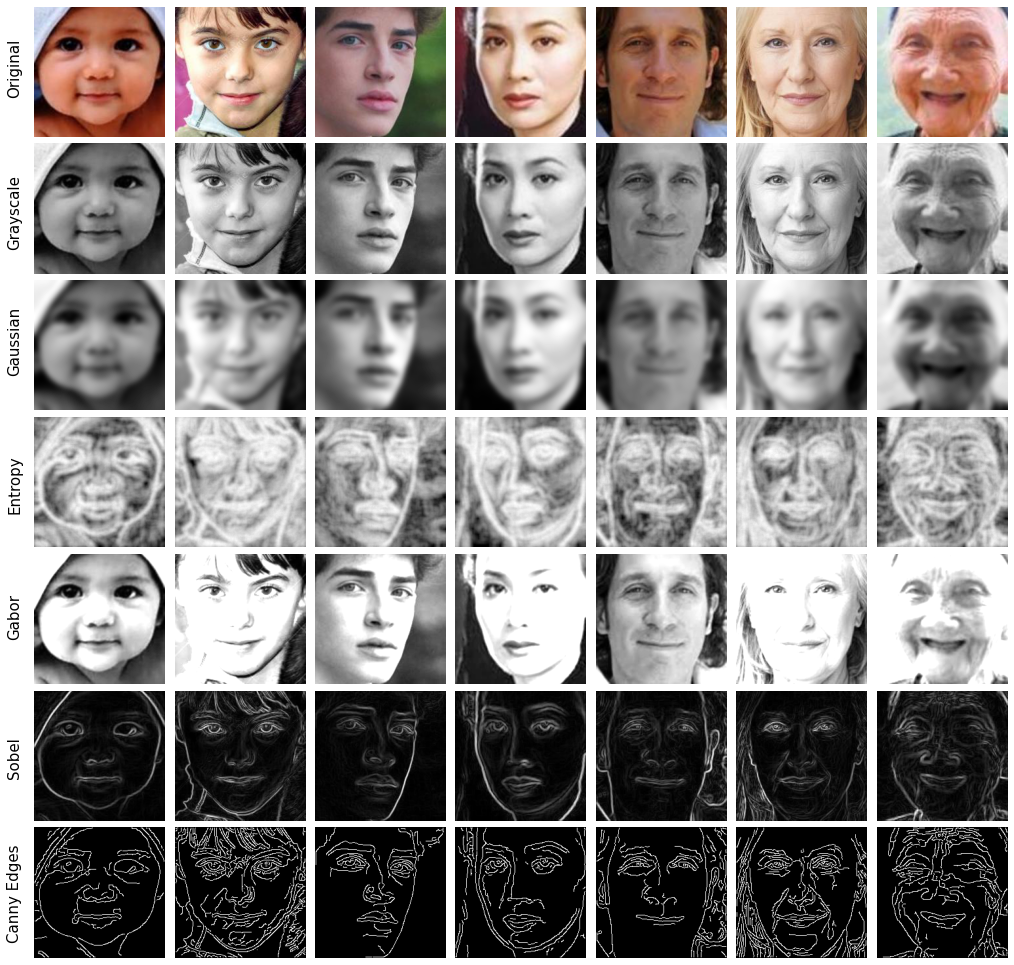

In [ ]:
sample_images_path = "sample_images"

sample_images = os.listdir(sample_images_path)

n_images = len(sample_images)

fig, ax = plt.subplots(nrows=7, ncols=n_images, figsize=(n_images*2.5, 17.5))
plt.gray()

ax= ax.ravel()

for i, img in enumerate(sample_images):
    
    img_path = os.path.join(sample_images_path, img)
    
    col_img = give_col_image(img_path)
    ax[i].imshow(col_img)
    ax[i].axis('off')
    
    gray_img = give_gray_image(col_img)
    ax[i+(n_images*1)].imshow(gray_img)
    ax[i+(n_images*1)].axis('off')
    
    gaussian_img = give_gaussian_image(gray_img)
    ax[i+(n_images*2)].imshow(gaussian_img)
    ax[i+(n_images*2)].axis('off')
    
    entropy_img = give_entropy_image(gray_img)
    ax[i+(n_images*3)].imshow(entropy_img)
    ax[i+(n_images*3)].axis('off')
    
    gabor_img = give_gabor_image(gray_img)
    ax[i+(n_images*4)].imshow(gabor_img)
    ax[i+(n_images*4)].axis('off')
    
    sobel_img = give_sobel_image(gray_img)
    ax[i+(n_images*5)].imshow(sobel_img)
    ax[i+(n_images*5)].axis('off')
    
    canny_img = give_canny_image(gray_img)
    ax[i+(n_images*6)].imshow(canny_img)
    ax[i+(n_images*6)].axis('off')
    
plt.subplots_adjust(hspace=0.05, wspace=0.05)

plt.figtext(x=0.105, y=0.81, s="Original", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.69, s="Grayscale", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.59, s="Gaussian", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.48, s="Entropy", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.38, s="Gabor", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.27, s="Sobel", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.14, s="Canny Edges", fontsize=15, rotation=90)
    
# Exporting plot image in PNG format.
cur_time = datetime.fromtimestamp(time.time()).strftime('%Y%m%d%H%M%S')


In [ ]:
plt.savefig(f"different_image_filters{cur_time}.png", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [ ]:
# Defining a function to break-down an image of 200x200 pixels into sections of 10x10 pixels each,
# and calculate the mean and stdev of the section.
# Function INPUT: An image of 200x200 pixel size.
# Function OUTPUT: Features array comprising of mean and stdev of 400 sections (10x10 pixels).

def features_grid(img):
    features = np.array([], dtype='uint8')
    section = 1
    
    for y in range(0, img.shape[0], 10):
        for x in range(0, img.shape[1], 10):

            # Cropping the image into a section.
            section_img = img[y:y+10, x:x+10]
            
            # Claculating the mean and stdev of the sectioned image.
            section_mean = np.mean(section_img)
            section_std = np.std(section_img)
            
            # Appending the above calculated values into features array.
            features = np.append(features, [section_mean, section_std])
    
    # Returning the features array.
    return features

In [ ]:
# Defining a function to loop through images in the dataset and extract the canny edges 
# mean and stdev values from 10x10 pixel sections of each image.

def extract_canny_edges(filename_series):

    # Creating an array of shape (1, 801) to store 400 canny edges mean values, 400 canny edges stdev values and 1 age value.
    all_imgs = np.zeros((1, 801), dtype='uint8')

    progress_counter = 0

    for img_path in filename_series:
        
        # Defining a path to the image and reading in the coloured image.
        #img_path = os.path.join(combined_faces_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        # Converting the coloured image to a grayscale image.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Converting the grayscale image to a canny edges filtered image.
        img = canny(img, sigma=0.9)
        
        # Using the function defined above, extracting the features (mean and stdev values of all 10x10 pixel sections from the image) from the canny edges filtered image.
        img_features = features_grid(img)

        # Adding the actual age value (from the image name) into the features array.
        #age = np.uint8(img_path.split("_")[0])##
        path = os.path.normpath(img_path)
        age=np.uint8(path.split(os.sep)[1])
        img_features = np.append(img_features, age)

        img_features = img_features.reshape(1, img_features.shape[0])

        # Adding the image's features into the all_imgs features array defined above.
        all_imgs = np.append(all_imgs, img_features, axis=0)

        # Keeping track of progress and printing relevant statements for the user.
        progress_counter += 1
        if progress_counter % 1000 == 0:
            print(f"Images processed for features extraction: {progress_counter} of {len(filename_series)}")

    # Getting rid of the first row of zeros created while defining the all_imgs array above.    
    all_imgs = all_imgs[1:]

    return all_imgs

In [ ]:
train_imgs = extract_canny_edges(X_train['filepaths'])

Images processed for features extraction: 1000 of 6844
Images processed for features extraction: 2000 of 6844
Images processed for features extraction: 3000 of 6844
Images processed for features extraction: 4000 of 6844
Images processed for features extraction: 5000 of 6844
Images processed for features extraction: 6000 of 6844


In [ ]:
train_imgs.shape

(6844, 801)

In [ ]:
# Exporting the above created features array as a .npy file for use in the model later.

with open("canny_features_age_train.npy", "wb") as f:
    np.save(f, train_imgs, allow_pickle=True)

In [ ]:
test_imgs = extract_canny_edges(X_test['filepaths'])

Images processed for features extraction: 1000 of 2934
Images processed for features extraction: 2000 of 2934


In [ ]:
test_imgs.shape

(2934, 801)

In [ ]:
# Exporting the above created features array as a .npy file for use in the model later.

with open("canny_features_age_test.npy", "wb") as f:
    np.save(f, test_imgs, allow_pickle=True)

In [ ]:
# Creating a list of columns names for the features arrays defined above.
# The column names correspond to the sectioned image's mean and stdev values.
# Last column is the age to be converted to target class label in the model later.

feature_names = []
section = 1
    
for y in range(0, 200, 10):
    for x in range(0, 200, 10):
        feature_names.append(f"sec{section}_mean")
        feature_names.append(f"sec{section}_std")
        section += 1

feature_names.append('age')

In [ ]:
feature_names[:10]

['sec1_mean',
 'sec1_std',
 'sec2_mean',
 'sec2_std',
 'sec3_mean',
 'sec3_std',
 'sec4_mean',
 'sec4_std',
 'sec5_mean',
 'sec5_std']

In [ ]:
feature_names[-10:]

['sec396_std',
 'sec397_mean',
 'sec397_std',
 'sec398_mean',
 'sec398_std',
 'sec399_mean',
 'sec399_std',
 'sec400_mean',
 'sec400_std',
 'age']

In [ ]:
len(feature_names)

801

In [ ]:
# Exporting the above created list of feature names as a CSV file for use in the model later.

pd.Series(feature_names).to_csv("canny_features_names.csv", index=False, header=['canny_edge_features'])

In [ ]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
feature_names = pd.read_csv("canny_features_names.csv")
feature_names

,canny_edge_features
0,sec1_mean
1,sec1_std
2,sec2_mean
3,sec2_std
4,sec3_mean
...,...
796,sec399_mean
797,sec399_std
798,sec400_mean
799,sec400_std


In [ ]:
train = np.load("canny_features_age_train.npy")
test = np.load("canny_features_age_test.npy")

In [ ]:
train_df = pd.DataFrame(train, columns=feature_names["canny_edge_features"])
test_df = pd.DataFrame(test, columns=feature_names["canny_edge_features"])

In [ ]:
train_df.head()

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,...,sec396_std,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std,age
0,0.13,0.336303,0.10,0.300000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.300000,0.11,0.312890,0.17,0.375633,0.14,0.346987,0.18,0.384187,2.0
1,0.27,0.443959,0.25,0.433013,0.12,0.324962,0.17,0.375633,0.00,0.000000,...,0.407308,0.10,0.300000,0.10,0.300000,0.03,0.170587,0.11,0.312890,27.0
2,0.21,0.407308,0.24,0.427083,0.24,0.427083,0.18,0.384187,0.10,0.300000,...,0.000000,0.06,0.237487,0.10,0.300000,0.10,0.300000,0.10,0.300000,23.0
3,0.00,0.000000,0.00,0.000000,0.09,0.286182,0.16,0.366606,0.18,0.384187,...,0.000000,0.04,0.195959,0.13,0.336303,0.00,0.000000,0.00,0.000000,89.0
4,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,29.0


In [ ]:
train_df.shape

(6844, 801)

In [ ]:
test_df.shape

(2934, 801)

In [ ]:
train_df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [ ]:
test_df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [ ]:
train_df['age'] = train_df['age'].astype(np.uint8)
test_df['age'] = test_df['age'].astype(np.uint8)

In [ ]:
# Creating a column of target class values using the function defined above.

train_df['target'] = train_df['age'].map(class_labels)
test_df['target'] = test_df['age'].map(class_labels)

In [ ]:
train_df

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,...,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std,age,target
0,0.13,0.336303,0.10,0.300000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.11,0.312890,0.17,0.375633,0.14,0.346987,0.18,0.384187,2,0
1,0.27,0.443959,0.25,0.433013,0.12,0.324962,0.17,0.375633,0.00,0.000000,...,0.10,0.300000,0.10,0.300000,0.03,0.170587,0.11,0.312890,27,3
2,0.21,0.407308,0.24,0.427083,0.24,0.427083,0.18,0.384187,0.10,0.300000,...,0.06,0.237487,0.10,0.300000,0.10,0.300000,0.10,0.300000,23,3
3,0.00,0.000000,0.00,0.000000,0.09,0.286182,0.16,0.366606,0.18,0.384187,...,0.04,0.195959,0.13,0.336303,0.00,0.000000,0.00,0.000000,89,6
4,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,29,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6839,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.05,0.217945,0.12,0.324962,18,2
6840,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.11,0.312890,0.13,0.336303,0.11,0.312890,0.21,0.407308,1,0
6841,0.00,0.000000,0.09,0.286182,0.09,0.286182,0.00,0.000000,0.00,0.000000,...,0.10,0.300000,0.10,0.300000,0.00,0.000000,0.00,0.000000,1,0
6842,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.25,0.433013,0.06,0.237487,10,1


In [ ]:
# Splitting the above train and test dataframes into features (X) and target (y).

X_train1 = train_df.drop(columns=['age', 'target'])
y_train1 = train_df['target']

X_test1 = test_df.drop(columns=['age', 'target'])
y_test1 = test_df['target']

In [ ]:
X_train1.shape

(6844, 800)

In [ ]:
X_test1.shape

(2934, 800)

In [ ]:
y_train1.value_counts(normalize=True)

0    0.218001
3    0.210111
5    0.168469
6    0.113676
1    0.104033
2    0.097896
4    0.087814
Name: target, dtype: float64

In [ ]:
# Checking the distribution of classes to ensure it is same as y_train.

y_test1.value_counts(normalize=True)

0    0.217791
3    0.210293
5    0.168712
6    0.113497
1    0.104294
2    0.097819
4    0.087594
Name: target, dtype: float64

In [ ]:
# Scaling X_train to the standard scale.
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train1)

In [ ]:
X_test_sc = ss.transform(X_test1)